# Toronto Neighborhoods Explore and Cluster

Task: Scrape the following Wikipedia page into a dataframe: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M 
    
       The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
       Ignore cells with a borough that is Not assigned
       More than one neighborhood can exist in one postal code area - combine them into one row with the neighborhoods separated with a comma
       If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough
       In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
       Submit a link to your Notebook on your Github repository. 

In [1]:
#import required libraries for the lab
import pandas as pd
import requests
from bs4 import BeautifulSoup
import lxml

acquire content from postal codes page from wikipedia

In [2]:
wkpdia_pg_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
wkpg_content = requests.get(wkpdia_pg_url).text
#create bs object for parsing with lxml
wkpg4_parsing = BeautifulSoup(wkpg_content,'lxml')
# capture the postcode table
wkpg_postcodes = wkpg4_parsing.find('table',class_='wikitable')

The for loop inits the dataframe, skips 'not assigned' boroughs, and renames neighborhoods to their borough's name if not assigned

In [3]:
first_iter=True
for tablerow in wkpg_postcodes.find_all('tr'):
    if first_iter:
        #init the pandas dataframe
        #first entry in table is the column names
        column_names = tablerow.text.split('\n')[1:-1]
        CanPCodes = pd.DataFrame(columns=column_names)
        first_iter = False
    elif tablerow.text.split('\n')[2]=='Not assigned':
        #ignore the row if borough is not assigned
        continue
    elif tablerow.text.split('\n')[3]=='Not assigned':
        # if neighborhood is not assigned, take on the name of borough
        modifyrow = tablerow.text.split('\n')[1:-1]
        modifyrow[-1] = modifyrow[1]
        CanPCodes = CanPCodes.append({'Postcode':modifyrow[0],'Borough':modifyrow[1],'Neighbourhood':modifyrow[2]},ignore_index=True)
    else:
        PostCode_row = tablerow.text.split('\n')[1:-1]
        CanPCodes = CanPCodes.append({'Postcode':PostCode_row[0],'Borough':PostCode_row[1],'Neighbourhood':PostCode_row[2]},ignore_index=True)

group by postcode, bourough, and aggregate neighborhoods splitting with commas
convert the resulting series to a dataframe

In [4]:
CanPCodes=CanPCodes.groupby(['Postcode','Borough'],as_index=False, sort=False).Neighbourhood.agg(', '.join)

In [5]:
CanPCodes

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


In [6]:
CanPCodes.shape[0]

103

The Geospatial_data.csv file was added to the project, then we can use the "find and add data"/"Insert to code" as "DataFrame" function provided by Watson Studio!

In [7]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Let's merge on Postal Code, but first rename to 'Postcode'

In [8]:
df_data_1.columns = ['Postcode', 'Latitude', 'Longitude']
df_data_1.columns
CanPCodes = CanPCodes.merge(df_data_1,on='Postcode')

In [9]:
CanPCodes

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


# Explore and Cluster Toronto Neighborhoods

In [11]:
!pip install folium

    100% |████████████████████████████████| 92kB 5.4MB/s eta 0:00:01
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: jinja2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: MarkupSafe>=0.23 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from jinja2->folium)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests->folium)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/

In [12]:
import folium
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 

In [13]:
address = 'Toronto, Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.653963, -79.387207.


In [96]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(CanPCodes['Latitude'], CanPCodes['Longitude'], CanPCodes['Borough'], CanPCodes['Neighbourhood']):
    label = '{}, {}'.format(neighborhood,borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=5, popup=label, 
                        color='blue',fill=True, fill_color='#3186cc',
                        fill_opacity=0.7).add_to(map_toronto)
map_toronto

# Since the map does not show in Github: I'm loading a picture from the Map as displayed in Wastson Studio
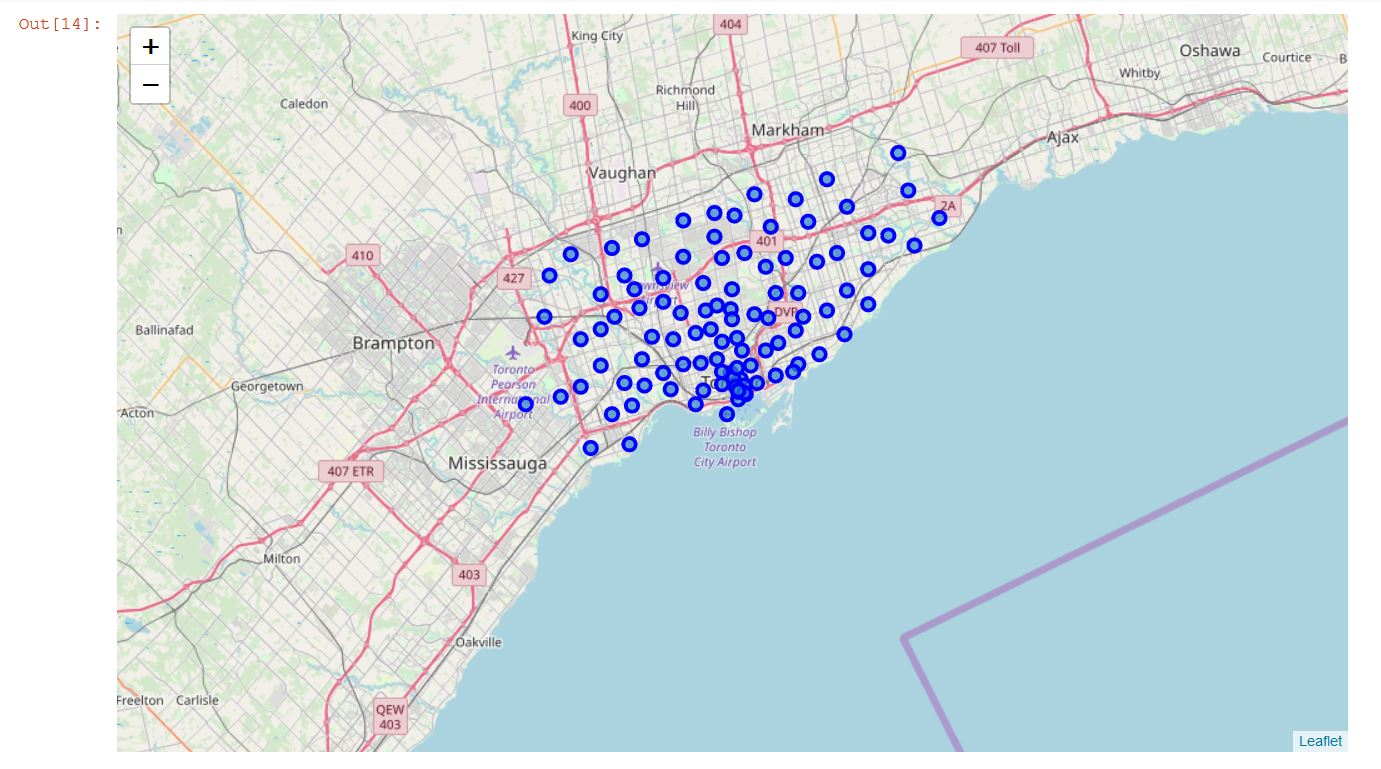
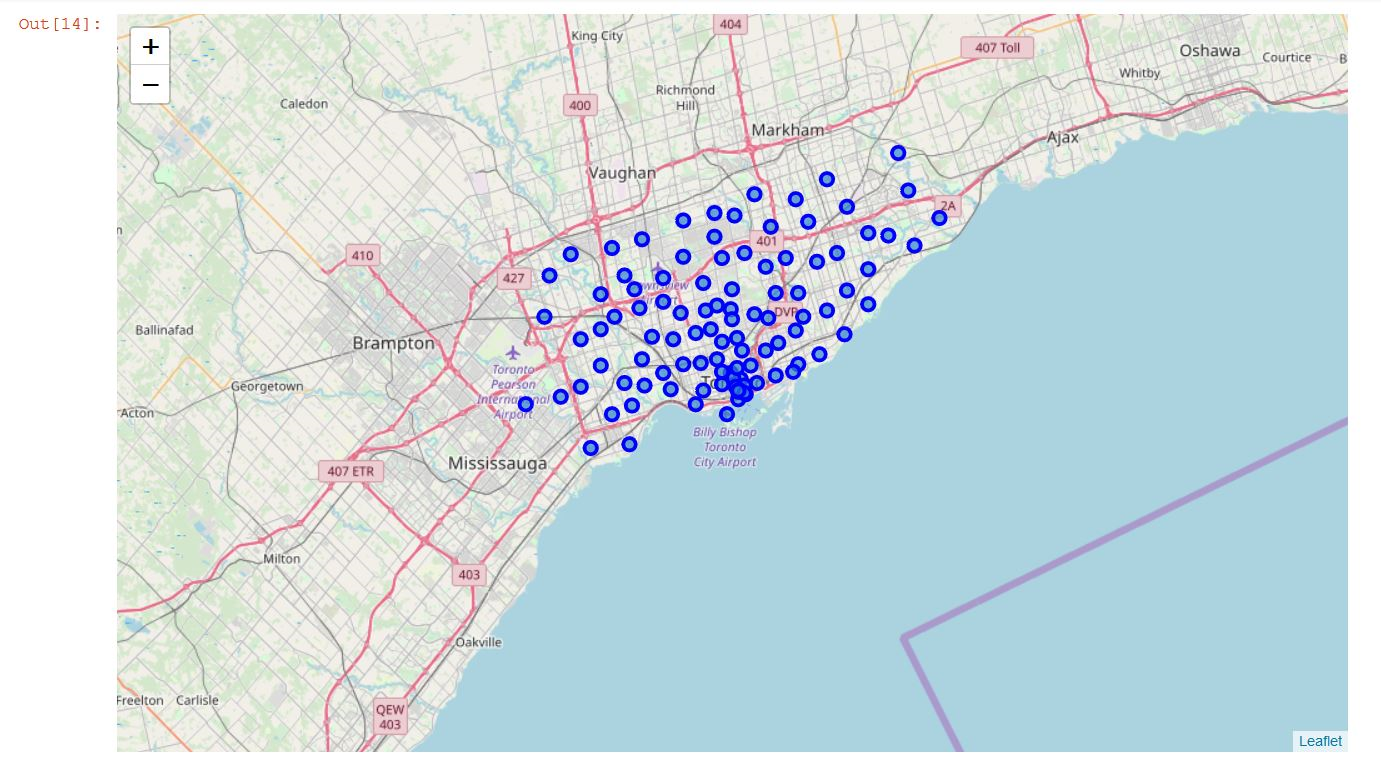

In [15]:
dwntown_toronto_data = CanPCodes[CanPCodes['Borough']=="Downtown Toronto"].reset_index(drop=True)

Set Client ID, Client Secret and Version for Foursquare API access
    - This cell removed before publishing

In [17]:
dwntown_toronto_data.loc[0, 'Neighbourhood']
neighborhood_latitude = dwntown_toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = dwntown_toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = dwntown_toronto_data.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Harbourfront, Regent Park are 43.6542599, -79.3606359.


    - This Cell removed before publishing

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c322d53dd57970a3396b828'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-54ea41ad498e9a11e9e13308-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d16a941735',
         'name': 'Bakery',
         'pluralName': 'Bakeries',
         'primary': True,
         'shortName': 'Bakery'}],
       'id': '54ea41ad498e9a11e9e13308',
       'location': {'address': '362 King St E',
        'cc': 'CA',
        'city': 'Toronto',
        'country': 'Canada',
        'crossStreet': 'Trinity St',
        'distance': 143,
        'formattedAddress': ['362 King St E (Trinity St)',
         'Toronto ON M5A 1K9',
         'Canada'],
        'labeledLatLngs': [{'label': 'display',
 

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
import json
from pandas.io.json import json_normalize

In [22]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Toronto Cooper Koo Family Cherry St YMCA Centre,Gym / Fitness Center,43.653191,-79.357947
3,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149
4,Body Blitz Spa East,Spa,43.654735,-79.359874


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

48 venues were returned by Foursquare.


Explore ALL Neighborhoods in Downtown Toronto

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
toronto_venues = getNearbyVenues(names=dwntown_toronto_data['Neighbourhood'],
                                  latitudes = dwntown_toronto_data['Latitude'],
                                  longitudes = dwntown_toronto_data['Longitude']
                                  )

Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Christie
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown, St. James Town
First Canadian Place, Underground city
Church and Wellesley


In [38]:
print(toronto_venues.shape)
toronto_venues.head()

(1287, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Harbourfront, Regent Park",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Harbourfront, Regent Park",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Harbourfront, Regent Park",43.65426,-79.360636,Toronto Cooper Koo Family Cherry St YMCA Centre,43.653191,-79.357947,Gym / Fitness Center
3,"Harbourfront, Regent Park",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
4,"Harbourfront, Regent Park",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [39]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,54,54,54,54,54,54
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",14,14,14,14,14,14
"Cabbagetown, St. James Town",48,48,48,48,48,48
Central Bay Street,85,85,85,85,85,85
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,16,16,16,16,16,16
Church and Wellesley,88,88,88,88,88,88
"Commerce Court, Victoria Hotel",100,100,100,100,100,100


In [70]:
print('There are {} unique categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 207 unique categories.


In [73]:
# one hot encoding of Venue Categories
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column index number 141 to the first column
fixed_columns = [toronto_onehot.columns[141]] + list(toronto_onehot.columns[0:141]) + list(toronto_onehot.columns[142:])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [74]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.00,0.00,0.00,0.010000,0.000000,0.000000,0.010000,0.000000,0.01,0.000000
1,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.000000,0.071429,0.071429,0.071429,0.142857,0.142857,0.142857,0.000000,...,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,"Cabbagetown, St. James Town",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,...,0.00,0.00,0.00,0.011765,0.000000,0.000000,0.011765,0.000000,0.00,0.011765
5,"Chinatown, Grange Park, Kensington Market",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.050000,0.000000,0.040000,0.010000,0.000000,0.00,0.000000
6,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
7,Church and Wellesley,0.011364,0.011364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011364,...,0.00,0.00,0.00,0.000000,0.011364,0.011364,0.000000,0.011364,0.00,0.011364
8,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.010000,0.000000,0.00,0.000000
9,"Design Exchange, Toronto Dominion Centre",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.00,0.00,0.01,0.000000,0.000000,0.000000,0.010000,0.000000,0.00,0.000000


print each neighborhood along with the top 3 most common venues

In [75]:
num_top_venues = 3

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                 venue  freq
0          Coffee Shop  0.06
1                 Café  0.05
2  American Restaurant  0.04


----Berczy Park----
          venue  freq
0   Coffee Shop  0.07
1  Cocktail Bar  0.06
2    Restaurant  0.06


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0  Airport Terminal  0.14
1    Airport Lounge  0.14
2   Airport Service  0.14


----Cabbagetown, St. James Town----
         venue  freq
0   Restaurant  0.08
1  Coffee Shop  0.08
2  Pizza Place  0.04


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.15
1                Café  0.07
2  Italian Restaurant  0.05


----Chinatown, Grange Park, Kensington Market----
                           venue  freq
0                           Café  0.07
1                            Bar  0.07
2  Vegetarian / Vegan Restaurant  0.05


----Christie----
           venue  freq
0      

In [76]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now create the new dataframe and display the top 5 venues for each neighborhood - import numpy first!

In [78]:
import numpy as np

In [79]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,American Restaurant,Thai Restaurant,Steakhouse
1,Berczy Park,Coffee Shop,Restaurant,Cocktail Bar,Seafood Restaurant,Bakery
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Service,Airport Terminal,Boat or Ferry,Boutique
3,"Cabbagetown, St. James Town",Restaurant,Coffee Shop,Park,Pub,Indian Restaurant
4,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Ice Cream Shop,Bar
5,"Chinatown, Grange Park, Kensington Market",Café,Bar,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Coffee Shop
6,Christie,Grocery Store,Café,Park,Athletics & Sports,Convenience Store
7,Church and Wellesley,Japanese Restaurant,Sushi Restaurant,Coffee Shop,Gay Bar,Restaurant
8,"Commerce Court, Victoria Hotel",Coffee Shop,Café,Restaurant,Hotel,American Restaurant
9,"Design Exchange, Toronto Dominion Centre",Coffee Shop,Hotel,Café,Restaurant,American Restaurant


# Cluster the Hoods!!

In [80]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 4, 1, 4, 0, 0, 3, 0, 0, 0], dtype=int32)

In [87]:
toronto_merged = dwntown_toronto_data

# add clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_
#rename columns -- focus on neighbourhood vs neighborhood
toronto_merged.columns = ['Postcode','Borough','Neighborhood','Latitude','Longitude','Cluster Labels']
#merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,0,Coffee Shop,Pub,Bakery,Park,Café
1,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,4,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Middle Eastern Restaurant
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Restaurant,Café,Hotel,Gastropub
3,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,4,Coffee Shop,Restaurant,Cocktail Bar,Seafood Restaurant,Bakery
4,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Coffee Shop,Café,Italian Restaurant,Ice Cream Shop,Bar


# Visualize the clusters!

In [95]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Since the map does not show in Github: I'm loading a picture from the Map as displayed in Wastson Studio

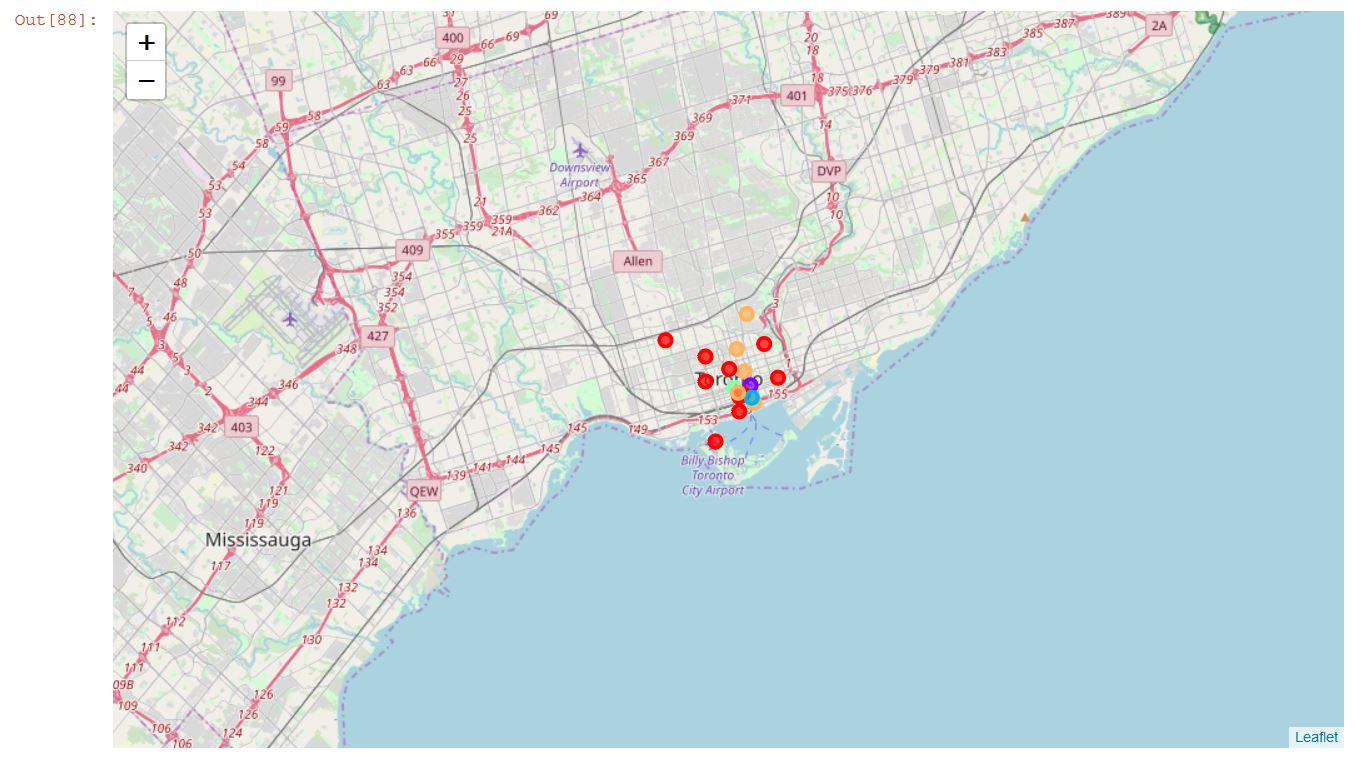
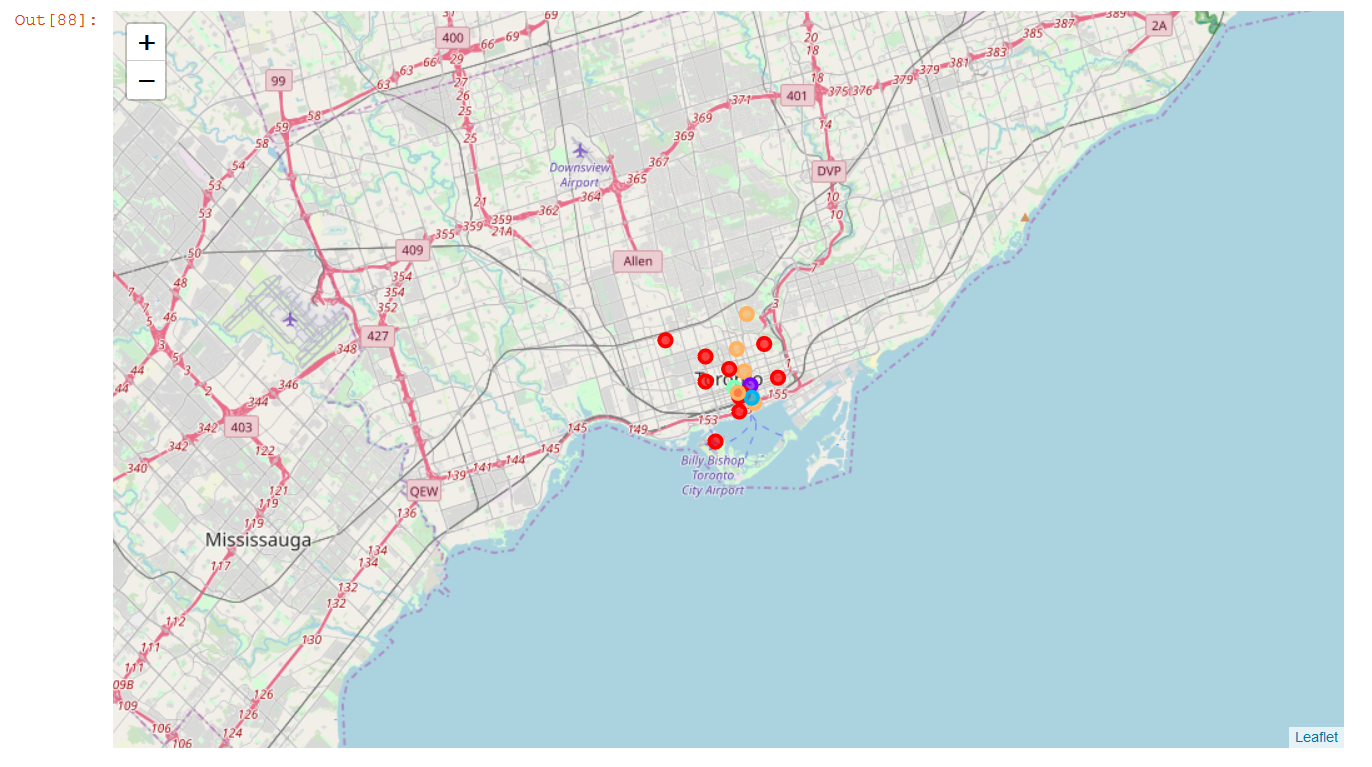


Examine the clusters

# cluster 1

In [90]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Downtown Toronto,0,Coffee Shop,Pub,Bakery,Park,Café
4,Downtown Toronto,0,Coffee Shop,Café,Italian Restaurant,Ice Cream Shop,Bar
5,Downtown Toronto,0,Grocery Store,Café,Park,Athletics & Sports,Convenience Store
7,Downtown Toronto,0,Coffee Shop,Aquarium,Hotel,Pizza Place,Café
8,Downtown Toronto,0,Coffee Shop,Hotel,Café,Restaurant,American Restaurant
9,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Hotel,American Restaurant
10,Downtown Toronto,0,Café,Restaurant,Bookstore,Bar,Japanese Restaurant
11,Downtown Toronto,0,Café,Bar,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Coffee Shop
12,Downtown Toronto,0,Airport Lounge,Airport Service,Airport Terminal,Boat or Ferry,Boutique
15,Downtown Toronto,0,Restaurant,Coffee Shop,Park,Pub,Indian Restaurant


# cluster 2

In [91]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Downtown Toronto,1,Coffee Shop,Restaurant,Café,Hotel,Gastropub


# cluster 3

In [92]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
14,Downtown Toronto,2,Coffee Shop,Restaurant,Café,Seafood Restaurant,Cocktail Bar


# cluster 4

In [93]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
6,Downtown Toronto,3,Coffee Shop,Café,American Restaurant,Thai Restaurant,Steakhouse


# cluster 5

In [94]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Downtown Toronto,4,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Middle Eastern Restaurant
3,Downtown Toronto,4,Coffee Shop,Restaurant,Cocktail Bar,Seafood Restaurant,Bakery
13,Downtown Toronto,4,Park,Playground,Trail,Yoga Studio,Department Store
16,Downtown Toronto,4,Coffee Shop,Café,Hotel,Restaurant,American Restaurant
17,Downtown Toronto,4,Japanese Restaurant,Sushi Restaurant,Coffee Shop,Gay Bar,Restaurant
